In [1]:
# imports 
# data science tools 
import pandas as pd
import numpy as np

#modeling tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier # will need to use Tfidf for this 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
# tree based shit
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from IPython.display import Image

#plotting tools
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
!pwd 

/Users/katychow/DSI/Projects/project-3/Code


In [2]:
psych = pd.read_csv('/Users/katychow/DSI/Projects/project-3/Data/Reddit_Psych_201812182015.csv')

In [3]:
mental = pd.read_csv('/Users/katychow/DSI/Projects/project-3/Data/Reddit_MH_201812160842.csv')

In [4]:
ds = pd.concat([psych,mental],ignore_index=True)

In [6]:
len(set(psych['title']))

857

In [76]:
len(set(mental['title']))

981

In [7]:
ds.shape

(1981, 10)

### this is not working 
```python
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    for w in w_tokenizer.tokenize(text):
        return lemmatizer.lemmatize(w) 

ds['text_lemmatized'] = ds.title.apply(lemmatize_text)

ds.head(2)
```

In [5]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [6]:
def lemma_lemma(my_example_string):
    my_example_list = []

    for each in my_example_string.split():
        my_example_list.append(lemmatizer.lemmatize(each))

    return ' '.join(my_example_list)

In [7]:
ds['text_lemmatized'] = ds.title.apply(lemma_lemma)

testing more things 
```python
ds.title[10]
ds.text_lemmatized[10]
```

In [11]:
ds.head()

,downs,likes,num_comments,score,subreddit,time_of_pull,title,ups,url,view_count,text_lemmatized
0,0,NaN,31,12,psychology,2018-12-18 20:24:57.575629,Psychological Research/Surveys Thread (December),12,https://www.reddit.com/r/psychology/comments/a...,NaN,Psychological Research/Surveys Thread (December)
1,0,NaN,31,8,psychology,2018-12-18 20:24:57.575638,Weekly Discussion Thread (December 2-8),8,https://www.reddit.com/r/psychology/comments/a...,NaN,Weekly Discussion Thread (December 2-8)
2,0,NaN,10,225,psychology,2018-12-18 20:24:57.575644,According to a study moderate to severe loneli...,225,https://www.eurekalert.org/pub_releases/2018-1...,NaN,According to a study moderate to severe loneli...
3,0,NaN,15,721,psychology,2018-12-18 20:24:57.575647,"In a new study, researchers show that gently s...",721,http://blogs.discovermagazine.com/d-brief/2018...,NaN,"In a new study, researcher show that gently st..."
4,0,NaN,2,78,psychology,2018-12-18 20:24:57.575649,Children of problem drinkers are more likely t...,78,https://news.vcu.edu/article/Children_of_probl...,NaN,Children of problem drinker are more likely to...


testing stuff
```python
my_example_string = 'testing on cats and dogs'
my_example_list = []

for each in my_example_string.split():
    my_example_list.append(lemmatizer.lemmatize(each))
    
' '.join(my_example_list)

for each in 'tests dogs cats'.split():
    print(lemmatizer.lemmatize(each))

[i for i in ds['text_lemmatized'][2:]]
```

In [8]:
cv = CountVectorizer(stop_words='english',ngram_range=(1,1))
cv.fit(ds.text_lemmatized)
data_cv = cv.transform(ds['text_lemmatized'])

cv_with_class = pd.DataFrame(data_cv.todense(), columns=cv.get_feature_names())

cv_with_class['subreddit'] = ds['subreddit']
cv_with_class = pd.get_dummies(cv_with_class,columns=['subreddit'],drop_first=True)

In [73]:
a = cv_with_class[cv_with_class['subreddit_psychology']==1].sum()
b = [i for i in a[:len(a)-1]]
print('total number of words in psychology subreddit titles ',sum(b))

total number of words in psychology subreddit titles  13575


In [75]:
a = cv_with_class[cv_with_class['subreddit_psychology']==0].sum()
b = [i for i in a[:len(a)-1]]
print('total number of words in mental health subreddit titles ',sum(b))

total number of words in mental health subreddit titles  4408


In [77]:
13575/4408

3.079627949183303

Text(0.5, 1.0, 'usage of words based on subreddit')

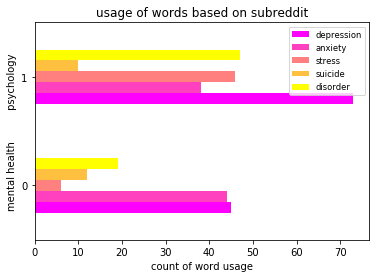

In [82]:
cv_with_class.groupby('subreddit_psychology')['depression','anxiety','stress','suicide','disorder'].sum().plot(kind='barh',colormap = 'spring')
plt.legend(loc='upper right',ncol = 1, fontsize = 'small')
plt.ylabel('mental health          psychology')
plt.xlabel('count of word usage')
plt.title('usage of words based on subreddit')
# plt.savefig('comparewordusageacross2subreddits.png')

<Figure size 1440x1080 with 0 Axes>

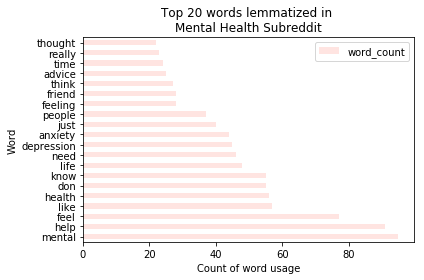

In [9]:
data_cv = cv.transform(ds[ds['subreddit']=='mentalhealth']['text_lemmatized'])
sum_words = data_cv.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
a = pd.DataFrame(words_freq,columns=['word','word_count']).head(20)
plt.figure(figsize = (20,15))
a.plot.barh(x='word', y='word_count',color='mistyrose')
plt.title('Top 20 words lemmatized in \nMental Health Subreddit')
plt.ylabel('Word',size = 10)
plt.xlabel('Count of word usage',size = 10);
plt.tight_layout()
# plt.savefig('Top20WordsLemmatizedMentalHealth2x2.png',pad_inches=1)

In [14]:
# !pip install WordCloud
from PIL import Image
from wordcloud import WordCloud

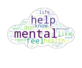

In [15]:
data_cv = cv.transform(ds[ds['subreddit']=='mentalhealth']['text_lemmatized'])
sum_words = data_cv.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

words_freq_dict = dict(words_freq)
text_str = ''.join([(i+' ')*j for i,j in words_freq])

mask = np.array(Image.open("/Users/katychow/DSI/Projects/project-3/Images/Blue_cloud.png"),np.int32)

def transform_format(val):
    if val == 0:
        return 255
    else:
        return 0
a = np.vectorize(transform_format)
new_mask = a(mask)

wordcloud = WordCloud(width = 2000, height = 1500, 
                        background_color ='white', 
                        mask = new_mask,
                        contour_width=0.5, 
                        contour_color='darkgray',
                        relative_scaling=1,
                        max_font_size=None,
                      colormap=sns.palplot(sns.color_palette("Set2"))
                ).generate_from_frequencies(words_freq_dict)

wordcloud.to_file('mentalhealth_wordcloud.png')


# plt.figure(figsize=(24,14), dpi=1200)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

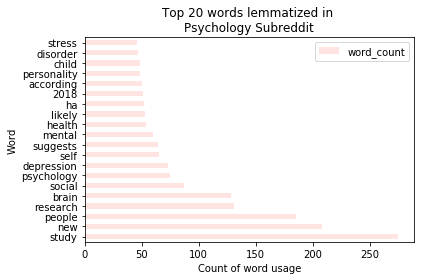

In [10]:
data_cv = cv.transform(ds[ds['subreddit']=='psychology']['text_lemmatized'])
sum_words = data_cv.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
pd.DataFrame(words_freq,columns=['word','word_count']).head(20)
a = pd.DataFrame(words_freq,columns=['word','word_count']).head(20)
a.plot.barh(x='word', y='word_count',color='mistyrose')
plt.title('Top 20 words lemmatized in \nPsychology Subreddit')
plt.ylabel('Word',size = 10)
plt.xlabel('Count of word usage',size = 10)
plt.tight_layout();
# plt.savefig('Top20WordsLemmatizedPsychology2x2.png')

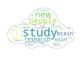

In [18]:
data_cv = cv.transform(ds[ds['subreddit']=='psychology']['text_lemmatized'])
sum_words = data_cv.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

words_freq_dict = dict(words_freq)
text_str = ''.join([(i+' ')*j for i,j in words_freq])

mask = np.array(Image.open("/Users/katychow/DSI/Projects/project-3/Images/Blue_cloud.png"),np.int32)

def transform_format(val):
    if val == 0:
        return 255
    else:
        return 0
a = np.vectorize(transform_format)
new_mask = a(mask)

wordcloud = WordCloud(width = 2000, height = 1500, 
                        background_color ='white', 
                        mask = new_mask,
                        contour_width=0.5, 
                        contour_color='darkgray',
                        relative_scaling=1,
                        max_font_size=None,
                      colormap=sns.palplot(sns.color_palette("Set2"))
                ).generate_from_frequencies(words_freq_dict)

wordcloud.to_file('psychology_wordcloud.png')


# plt.figure(figsize=(24,14), dpi=1200)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

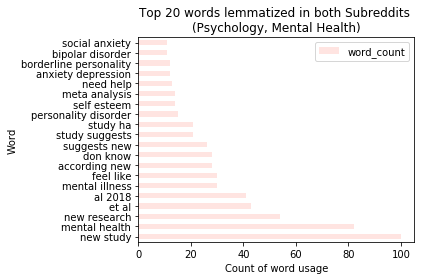

In [22]:
data_cv = cv.transform(ds['text_lemmatized'])
sum_words = data_cv.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
a = pd.DataFrame(words_freq,columns=['word','word_count']).head(20)
a.plot.barh(x='word', y='word_count',color='mistyrose')
plt.title('Top 20 words lemmatized in both Subreddits \n(Psychology, Mental Health)')
plt.ylabel('Word',size = 10)
plt.xlabel('Count of word usage',size = 10)
plt.tight_layout();
# plt.savefig('Top20WordsLemmatized2Subreddits2x2.png')

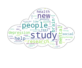

In [20]:
data_cv = cv.transform(ds['text_lemmatized'])
sum_words = data_cv.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

words_freq_dict = dict(words_freq)
text_str = ''.join([(i+' ')*j for i,j in words_freq])

mask = np.array(Image.open("/Users/katychow/DSI/Projects/project-3/Images/Blue_cloud.png"),np.int32)

def transform_format(val):
    if val == 0:
        return 255
    else:
        return 0
a = np.vectorize(transform_format)
new_mask = a(mask)

wordcloud = WordCloud(width = 2000, height = 1500, 
                        background_color ='white', 
                        mask = new_mask,
                        contour_width=0.5, 
                        contour_color='darkgray',
                        relative_scaling=1,
                        max_font_size=None,
                      colormap=sns.palplot(sns.color_palette("Set2"))
                ).generate_from_frequencies(words_freq_dict)

wordcloud.to_file('subreddit_wordcloud.png')


# plt.figure(figsize=(24,14), dpi=1200)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

In [21]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,1))
tfidf.fit(ds.text_lemmatized)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

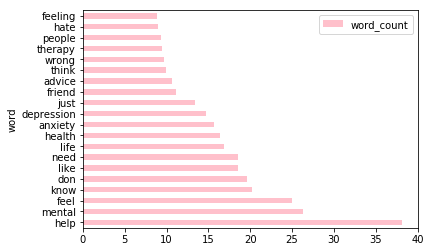

In [22]:
data_tfidf = tfidf.transform(ds[ds['subreddit']=='mentalhealth']['text_lemmatized'])
sum_words = data_tfidf.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     tfidf.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
pd.DataFrame(words_freq,columns=['word','word_count']).head(20)
pd.DataFrame(words_freq,columns=['word','word_count']).head(20).plot.barh(x='word', y='word_count',color='pink')

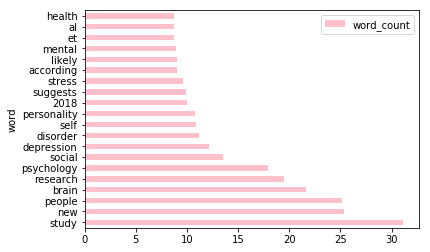

In [23]:
data_tfidf = tfidf.transform(ds[ds['subreddit']=='psychology']['text_lemmatized'])
sum_words = data_tfidf.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     tfidf.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
pd.DataFrame(words_freq,columns=['word','word_count']).head(20)
pd.DataFrame(words_freq,columns=['word','word_count']).head(20).plot.barh(x='word', y='word_count',color='pink')

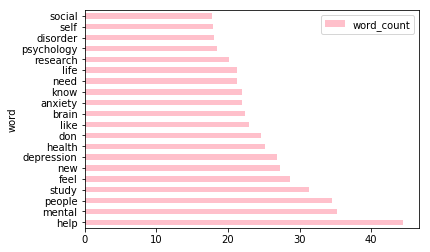

In [24]:
data_tfidf = tfidf.transform(ds['text_lemmatized'])
sum_words = data_tfidf.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     tfidf.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
pd.DataFrame(words_freq,columns=['word','word_count']).head(20)
pd.DataFrame(words_freq,columns=['word','word_count']).head(20).plot.barh(x='word', y='word_count',color='pink')